# IMPORT OF LIBRAIRIES 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import calendar
from functions import *
import urllib.parse
from matplotlib.pyplot import figure
import geoip2.database
import socket
from tld import get_tld

import re
import json
from urllib.request import urlopen
import pygeoip

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrien/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/adrien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
quotes_2020 = pd.io.json.read_json('quotes-2017.json.bz2', lines = True)

### Creation of a column containing the month when the month when the quote was reported


In [3]:
quotes_2020['month'] = quotes_2020['date'].dt.month.apply(lambda x: calendar.month_abbr[x])   
quotes_2020

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,month
0,2017-10-10-083023,left the realm of the merely destructive and e...,Tanya Plibersek,[Q7684036],2017-10-10 05:07:05,86,"[[Tanya Plibersek, 0.7071], [Tony Abbott, 0.13...",[http://armidaleexpress.com.au/story/4979274/a...,E,Tuesday,Oct
1,2017-09-06-003914,advance this climate change agenda.,Rush Limbaugh,[Q319072],2017-09-06 23:12:48,73,"[[Rush Limbaugh, 0.6842], [None, 0.2011], [Al ...",[http://feeds.nydailynews.com/~r/nydnrss/sport...,E,Wednesday,Sep
2,2017-07-06-075459,may find some allies on climate change,Donald Trump,"[Q22686, Q27947481]",2017-07-06 09:04:06,1,"[[Donald Trump, 0.624], [None, 0.376]]",[https://www.carbonbrief.org/daily-brief/volvo...,E,Thursday,Jul
3,2017-12-20-072848,Mayor Lee's commitment to environmental policy...,Gina McCarthy,[Q5562899],2017-12-20 09:00:35,1,"[[Gina McCarthy, 0.9385], [None, 0.053], [Ed L...",[http://www.sfexaminer.com/retirement-board-he...,E,Wednesday,Dec
4,2017-06-06-081706,"now under threat as never before: pollution, o...",António Guterres,[Q311440],2017-06-06 11:44:00,1,"[[António Guterres, 0.8775], [None, 0.1225]]",[https://sg.finance.yahoo.com/news/un-secretar...,E,Tuesday,Jun
...,...,...,...,...,...,...,...,...,...,...,...
30130,2017-09-22-018445,Climate change is a megatrend that has wide-ra...,None,[],2017-09-22 18:40:00,1,"[[None, 0.9198], [Bharat Masrani, 0.0802]]",[http://www.greenpeace.org/canada/en/blog/Blog...,E,Friday,Sep
30131,2017-06-12-017608,Developing countries seem to be waking up to e...,John Irvine,"[Q16142752, Q58810703, Q6240858]",2017-06-12 00:00:00,2,"[[John Irvine, 0.8938], [None, 0.1063]]",[http://punchng.com/nigeria-must-join-push-for...,E,Monday,Jun
30132,2017-09-20-032353,Global warming is an existential threat to hum...,Barbara Parker,"[Q2555588, Q4859211, Q4859212]",2017-09-20 13:15:00,6,"[[Barbara Parker, 0.4425], [None, 0.3065], [J....",[http://www.prnewswire.com/news-releases/san-f...,E,Wednesday,Sep
30133,2017-04-14-023043,"global warming is dead, nailed into its coffin...",Bret Stephens,[Q4961960],2017-04-14 20:18:33,2,"[[Bret Stephens, 0.728], [None, 0.272]]",[http://www.environmentalhealthnews.org/t/2251...,E,Friday,Apr


In [4]:
quotes_2020['date'] = quotes_2020['date'].dt.date

### Here create a serie containing the number of quotations per day in descending order 

In [5]:
quotes_date_occurence = quotes_2020.groupby('date').date.count()
quotes_date_occurence = quotes_date_occurence.sort_values(ascending= False)
quotes_date_occurence.head(10)

date
2017-06-02    960
2017-06-01    666
2017-05-31    327
2017-06-05    309
2017-06-06    273
2017-03-29    251
2017-03-28    250
2017-06-07    220
2017-09-11    211
2017-09-12    191
Name: date, dtype: int64

## Plot of the quotations reported per month

Text(-2.700000000000003, 0.5, 'Count')

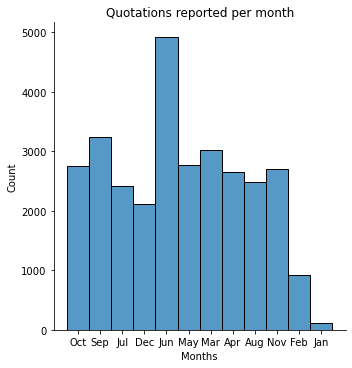

In [6]:
sns.displot(quotes_2020['month'])
plt.title('Quotations reported per month')
plt.xlabel("Months")
plt.ylabel("Count")

### We then select  the quotations reported on peak days 

In [7]:
top_ten_days = quotes_date_occurence.index[:10].astype(str)
quotations_peak  = quotes_2020[quotes_2020['date'].astype(str).apply(lambda x: x in top_ten_days.to_list())]
quotations_peak.reset_index(drop = True, inplace = True)
quotations_peak

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,month
0,2017-06-06-081706,"now under threat as never before: pollution, o...",António Guterres,[Q311440],2017-06-06,1,"[[António Guterres, 0.8775], [None, 0.1225]]",[https://sg.finance.yahoo.com/news/un-secretar...,E,Tuesday,Jun
1,2017-06-02-005735,American Rivers will continue to stand with th...,Bob Irvin,[Q4932894],2017-06-02,2,"[[Bob Irvin, 0.8016], [None, 0.1984]]",[https://insurancenewsnet.com/oarticle/america...,E,Friday,Jun
2,2017-06-07-029179,global warming is one of the gravest challenge...,None,[],2017-06-07,21,"[[None, 0.8978], [Donald Trump, 0.058], [Presi...",[http://mobile.sfgate.com/news/article/North-K...,E,Wednesday,Jun
3,2017-06-02-057495,"In Massachusetts and around the world, climate...",Charlie Baker,"[Q28051620, Q5076629, Q5084482, Q56254750]",2017-06-02,14,"[[Charlie Baker, 0.4938], [Governor Charlie Ba...",[http://www.bostonglobe.com/metro/2017/06/01/a...,E,Friday,Jun
4,2017-06-06-006360,and help California and Los Angelenos on clima...,Jimmy Gomez,[Q6200205],2017-06-06,3,"[[Jimmy Gomez, 0.5484], [None, 0.2221], [Frank...",[http://nbcnews.com/news/latino/latino-asian-a...,E,Tuesday,Jun
...,...,...,...,...,...,...,...,...,...,...,...
3653,2017-06-06-078926,My sense is that people understand that there'...,Bill Morneau,[Q21175197],2017-06-06,2,"[[Bill Morneau, 0.8069], [None, 0.1931]]",[http://www.ctvnews.ca/politics/morneau-says-n...,E,Tuesday,Jun
3654,2017-06-02-088546,President Trump is ignoring the impact of clim...,None,[],2017-06-02,1,"[[None, 0.8048], [President Trump, 0.1952]]",[http://www.abc2news.com/news/region/baltimore...,E,Friday,Jun
3655,2017-06-06-130301,We are disappointed with today's decision by t...,Brad Smith,"[Q15477554, Q16218831, Q23664265, Q24084114, Q...",2017-06-06,1,"[[Brad Smith, 0.9061], [None, 0.0851], [Satya ...",[http://nlpc.org/2017/06/06/hypocritical-ceos-...,E,Tuesday,Jun
3656,2017-06-02-129517,We are on the front lines addressing climate c...,None,[],2017-06-02,1,"[[None, 0.7212], [Edward Mazria, 0.194], [Pres...",[https://www.curbed.com/2017/6/2/15727258/pari...,E,Friday,Jun


## Plot of the number of quotations reported per day 

Text(0.5, 1.0, 'Number of quotations reported per day ')

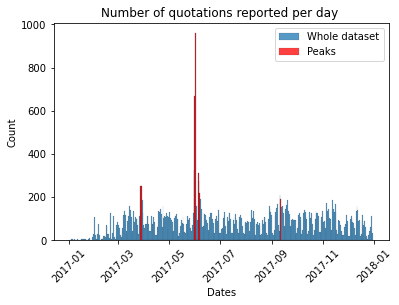

In [8]:
sns.histplot(quotes_2020['date'],label = "Whole dataset", bins =5*365)
sns.histplot(quotations_peak['date'], color = 'red',label = "Peaks") 
plt.xticks(rotation= 45 )
plt.xlabel('Dates')
plt.ylabel('Count')
plt.legend()

plt.title('Number of quotations reported per day ')

In [9]:
date_1 = '2017-06-02'

In [10]:
country_tld = pd.read_excel('tld_country.xlsx', header= 0)
uk_tld = {"Country" : 'UNITED KINGDOM', "TLD" :'UK'}
country_tld = country_tld.append(uk_tld,ignore_index=True)


In [11]:
country_tld

,Country,TLD
0,AFGHANISTAN,AF
1,ÅLAND ISLANDS,AX
2,ALBANIA,AL
3,ALGERIA,DZ
4,AMERICAN SAMOA,AS
...,...,...
245,WESTERN SAHARA,EH
246,YEMEN,YE
247,ZAMBIA,ZM
248,ZIMBABWE,ZW


In [12]:
country_tld['TLD'] = country_tld['TLD'].str.lower()
country_tld['Country'] = country_tld['Country'].str.lower()
country_tld


,Country,TLD
0,afghanistan,af
1,åland islands,ax
2,albania,al
3,algeria,dz
4,american samoa,as
...,...,...
245,western sahara,eh
246,yemen,ye
247,zambia,zm
248,zimbabwe,zw


In [13]:
quotations_peak

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,month
0,2017-06-06-081706,"now under threat as never before: pollution, o...",António Guterres,[Q311440],2017-06-06,1,"[[António Guterres, 0.8775], [None, 0.1225]]",[https://sg.finance.yahoo.com/news/un-secretar...,E,Tuesday,Jun
1,2017-06-02-005735,American Rivers will continue to stand with th...,Bob Irvin,[Q4932894],2017-06-02,2,"[[Bob Irvin, 0.8016], [None, 0.1984]]",[https://insurancenewsnet.com/oarticle/america...,E,Friday,Jun
2,2017-06-07-029179,global warming is one of the gravest challenge...,None,[],2017-06-07,21,"[[None, 0.8978], [Donald Trump, 0.058], [Presi...",[http://mobile.sfgate.com/news/article/North-K...,E,Wednesday,Jun
3,2017-06-02-057495,"In Massachusetts and around the world, climate...",Charlie Baker,"[Q28051620, Q5076629, Q5084482, Q56254750]",2017-06-02,14,"[[Charlie Baker, 0.4938], [Governor Charlie Ba...",[http://www.bostonglobe.com/metro/2017/06/01/a...,E,Friday,Jun
4,2017-06-06-006360,and help California and Los Angelenos on clima...,Jimmy Gomez,[Q6200205],2017-06-06,3,"[[Jimmy Gomez, 0.5484], [None, 0.2221], [Frank...",[http://nbcnews.com/news/latino/latino-asian-a...,E,Tuesday,Jun
...,...,...,...,...,...,...,...,...,...,...,...
3653,2017-06-06-078926,My sense is that people understand that there'...,Bill Morneau,[Q21175197],2017-06-06,2,"[[Bill Morneau, 0.8069], [None, 0.1931]]",[http://www.ctvnews.ca/politics/morneau-says-n...,E,Tuesday,Jun
3654,2017-06-02-088546,President Trump is ignoring the impact of clim...,None,[],2017-06-02,1,"[[None, 0.8048], [President Trump, 0.1952]]",[http://www.abc2news.com/news/region/baltimore...,E,Friday,Jun
3655,2017-06-06-130301,We are disappointed with today's decision by t...,Brad Smith,"[Q15477554, Q16218831, Q23664265, Q24084114, Q...",2017-06-06,1,"[[Brad Smith, 0.9061], [None, 0.0851], [Satya ...",[http://nlpc.org/2017/06/06/hypocritical-ceos-...,E,Tuesday,Jun
3656,2017-06-02-129517,We are on the front lines addressing climate c...,None,[],2017-06-02,1,"[[None, 0.7212], [Edward Mazria, 0.194], [Pres...",[https://www.curbed.com/2017/6/2/15727258/pari...,E,Friday,Jun


In [14]:
quotes_cop = quotations_peak[quotations_peak.date.astype(str)== date_1 ]
quotes_cop.reset_index(drop = True, inplace = True)

In [38]:
urls_vect = quotes_cop.urls



In [41]:
count =pd.Series([ len(listElem) for listElem in urls_vect])
#number of sources per quotations on average
count.mean()


7.129166666666666

In [16]:


website_vect = []
tld_vect = []
for urls in urls_vect:
    
    for j in urls:
        
        parsed_url = urllib.parse.urlparse(j)[1]
        website_vect.append(parsed_url)
        tld_vect.append(get_tld(j))

        #print(domain)
 

In [17]:
country_tld

,Country,TLD
0,afghanistan,af
1,åland islands,ax
2,albania,al
3,algeria,dz
4,american samoa,as
...,...,...
245,western sahara,eh
246,yemen,ye
247,zambia,zm
248,zimbabwe,zw


In [18]:
country_website = []

for j in range(len(tld_vect)):
    
    
    try:
        ip = socket.gethostbyname(website_vect[j])
        
        reader = geoip2.database.Reader('GeoLite2-Country.mmdb')
        response = reader.country(ip)
        
        country = np.array(country_tld.Country[country_tld.TLD ==response.country.iso_code.lower()])[0]# Results in 'US'
        
    except Exception:

        country = None
   
    
    for i in range(country_tld.shape[0]):
        
        if tld_vect[j] =='co.uk':
            
            country = np.array(country_tld.Country[country_tld.TLD == 'uk'])[0]
        
        elif country_tld.TLD[i] in  tld_vect[j].split('.'):
            
            country = country_tld.Country[i]
    
    country_website.append(country)
        
        

In [22]:
country_url = pd.DataFrame({'website': website_vect , 'Country': country_website})
country_url

,website,Country
0,insurancenewsnet.com,united states
1,www.americanrivers.org,united states
2,www.bostonglobe.com,switzerland
3,www.bostonglobe.com,switzerland
4,boston.cbslocal.com,united states
...,...,...
6839,feeds.nydailynews.com,united states
6840,www.nydailynews.com,switzerland
6841,www.eenews.net,None
6842,www.abc2news.com,united states


<AxesSubplot:>

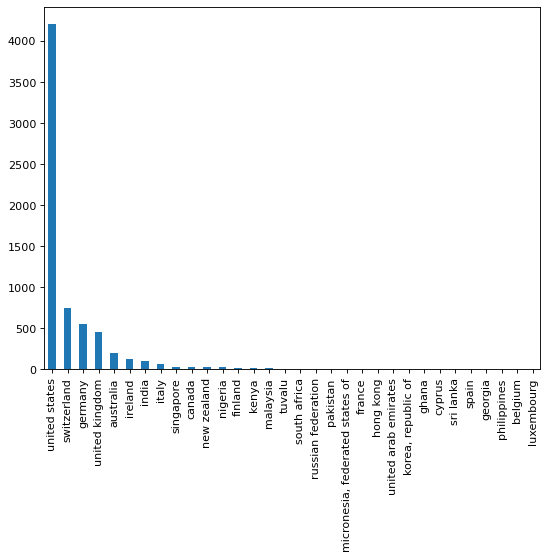

In [29]:

figure(figsize=(8, 6), dpi=80)
country_url.Country.value_counts().plot(kind='bar')
#plt.yscale('log')

In [56]:
quotations_only = quotes_cop.quotation

In [58]:
quotes_cop

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,day,month
0,2017-06-02-005735,American Rivers will continue to stand with th...,Bob Irvin,[Q4932894],2017-06-02,2,"[[Bob Irvin, 0.8016], [None, 0.1984]]",[https://insurancenewsnet.com/oarticle/america...,E,Friday,Jun
1,2017-06-02-057495,"In Massachusetts and around the world, climate...",Charlie Baker,"[Q28051620, Q5076629, Q5084482, Q56254750]",2017-06-02,14,"[[Charlie Baker, 0.4938], [Governor Charlie Ba...",[http://www.bostonglobe.com/metro/2017/06/01/a...,E,Friday,Jun
2,2017-06-02-029125,He believes that global warming is naturally o...,Kellyanne Conway,[Q6386365],2017-06-02,260,"[[Kellyanne Conway, 0.8911], [President Donald...",[http://abcnews.go.com/Technology/wireStory/tr...,E,Friday,Jun
3,2017-06-02-141583,we're rescinding our leadership on addressing ...,None,[],2017-06-02,1,"[[None, 0.6552], [President Trump, 0.3448]]",[http://midwestenergynews.com/digests/minnesot...,E,Friday,Jun
4,2017-06-02-123575,"Through our witness, we recognize that our gov...",None,[],2017-06-02,1,"[[None, 0.8703], [President Donald Trump, 0.12...",[http://catholicphilly.com/2017/06/news/nation...,E,Friday,Jun
...,...,...,...,...,...,...,...,...,...,...,...
955,2017-06-02-034432,"However, undermining action addressing climate...",Chris Lee,"[Q1077464, Q1077474, Q12305774, Q16221404, Q22...",2017-06-02,1,"[[Chris Lee, 0.729], [None, 0.2665], [Ivanka T...",[http://www.civilbeat.org/2017/06/pulling-out-...,E,Friday,Jun
956,2017-06-02-122785,This was not a litmus test on the reality of c...,R.C. Hammond,[Q7273320],2017-06-02,115,"[[R.C. Hammond, 0.7746], [None, 0.1849], [Rex ...",[http://mobile.sfgate.com/news/politics/articl...,E,Friday,Jun
957,2017-06-02-017552,Climate change is an international problem tha...,None,[],2017-06-02,4,"[[None, 0.7418], [President Trump, 0.1471], [G...",[http://feeds.nydailynews.com/~r/nydnrss/news/...,E,Friday,Jun
958,2017-06-02-088546,President Trump is ignoring the impact of clim...,None,[],2017-06-02,1,"[[None, 0.8048], [President Trump, 0.1952]]",[http://www.abc2news.com/news/region/baltimore...,E,Friday,Jun


In [57]:
quotations_only[0]

"American Rivers will continue to stand with these local leaders, and we will continue helping communities build their resilience with innovative river conservation solutions. We will work to ensure the United States remains a global leader in river restoration and protection, because a healthy river is a community's best defense against the impacts of climate change."

## Pronouns

In [128]:
pronouns_us =  ['we' ,'us' , 'ours' , 'our' ,'mine' , "mine" , 'I' , 'Me' , 'Mine' , "Mines" , 'We' , 'Us' , 'Ours' , 'Our']
pronouns_them =  ['them' , "they" , 'their' , 'theirs',  'He' , "his"  , 'him', "They" , 'Them' , 'Their' , 'Theirs' , 'He' , "His" , 'Him']

 

mask_us_them= [ ((us in quotes) and  (them in quotes)) for quotes in quotations_only for us in pronouns_us  for them in pronouns_them ]
            
mask_us = [ (us in quotes)  for quotes in quotations_only for us in pronouns_us  ]            
 
    
mask_us_them = []
mask_us = []


mask_them = []

for quote in quotations_only:
    any_us = False
    for us in pronouns_us :
        if us in quote:
            any_us = True
            break
    
    mask_us.append(any_us)


for quote in quotations_only:
    any_them = False
    for them in pronouns_them :
        if them in quote:
            any_them = True
            break
    
    mask_them.append(any_them)
    
    
for quote in quotations_only:
    any_us_them = False
    for them in pronouns_them :
        for us in pronouns_us:
            if (them in quote) and (us in quote):
                any_us_them = True
                break
        break
    
    mask_us_them.append(any_us_them)

        
        
        

quotes_us = quotes_cop[mask_us]

quotes_them = quotes_cop[mask_them]

quotes_us_them = quotes_cop[mask_us_them]

quotes_us_them.quotation.iloc[5]


quotes_us.shape



(715, 11)

In [202]:
quotes_us_them.quotation.iloc[2]

"This summer broke countless heat records in Sydney. We've seen coral bleaching in the harbour and the clock is ticking on climate change. We want governments working with our cities, supporting us, having policies of their own-but if not, we need them to get out of the way and let us do what has to be done."

## Sentiment analysis  

In [203]:
!pip install afinn

     |████████████████████████████████| 52 kB 2.6 MB/s eta 0:00:011
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=7c10f58df80729101b7c566d181d3bb1c33cbd22a7ee08cfcce00a1163889914
  Stored in directory: /Users/adrien/Library/Caches/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [204]:
from afinn import Afinn

In [205]:
afinn = Afinn(language='en')

In [209]:
afinn.score(quotes_us_them.quotation.iloc[12])

8.0

<AxesSubplot:ylabel='Frequency'>

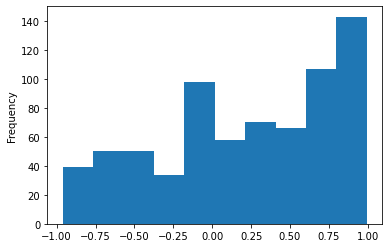

In [194]:

coumpound_sentiment_us = quotes_us.quotation.apply(lambda x : analyzer.polarity_scores(x)["compound"])
coumpound_sentiment_us.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

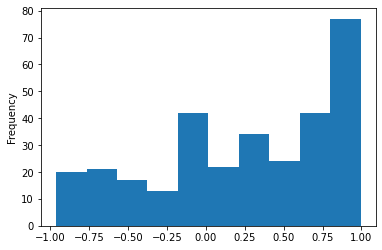

In [195]:

coumpound_sentiment_them = quotes_them.quotation.apply(lambda x : analyzer.polarity_scores(x)["compound"])
coumpound_sentiment_them.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

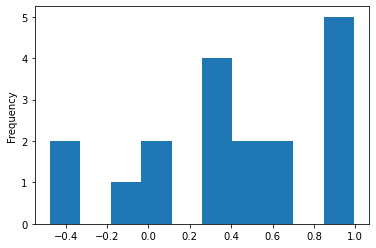

In [196]:

coumpound_sentiment_us_them = quotes_us_them.quotation.apply(lambda x : analyzer.polarity_scores(x)["compound"])
coumpound_sentiment_us_them.plot(kind = 'hist')

In [168]:
flat_list_us_them = " ".join([quotes for quotes in quotes_us_them.quotation])

flat_list_us = " ".join([quotes for quotes in quotes_us.quotation])

flat_list_them = " ".join([quotes for quotes in quotes_them.quotation])



In [169]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(flat_list_us_them)

In [170]:
vs

{'neg': 0.089, 'neu': 0.737, 'pos': 0.174, 'compound': 0.9994}

In [171]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(flat_list_us)

In [172]:
vs

{'neg': 0.091, 'neu': 0.734, 'pos': 0.176, 'compound': 1.0}

In [173]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(flat_list_them)

In [174]:
vs

{'neg': 0.086, 'neu': 0.749, 'pos': 0.165, 'compound': 1.0}

In [197]:
coumpound_sentiment_us_them.mean()

0.4134444444444445

In [198]:
coumpound_sentiment_us.mean()

0.22588447552447574

In [199]:
coumpound_sentiment_them.mean()

0.2560096153846151